# Лабораторная работа No 4


## Распознавание рукописных символов

### Цель

Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10
категориям (от 0 до 9).

Набор данных содержит 60,000 изображений для обучения и 10,000 изображений для
тестирования.

### Задачи
1. Ознакомиться с представлением графических данных
2. Ознакомиться с простейшим способом передачи графических данных нейронной сети
3. Создать модель
4. Настроить параметры обучения
5. Написать функцию, позволяющая загружать изображение пользователи и классифицировать его

### Выполнение работы

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Здесь train_images и train_labels — это тренировочный набор, то есть данные,
необходимые для обучения. После обучения модель будет проверяться тестовым (или
контрольным) набором, test_images и test_labels. Изображения хранятся в массивах
Numpy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом
соответствии, один к одному.
Для проверки корректности загрузки достаточно сравнить тестовое изображение с его
меткой.

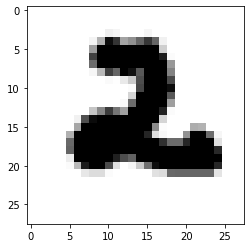

2


In [2]:
plt.imshow(train_images[1255],cmap=plt.cm.binary)
plt.show()
print(train_labels[1255])

Исходные изображения представлены в виде массивов чисел в интервале [0, 255]. Перед
обучением их необходимо преобразовать так, чтобы все значения оказались в интервале
[0, 1].

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Также необходимо закодировать метки категорий. В данном случае прямое кодирование
меток заключается в конструировании вектора с нулевыми элементами со значением 1 в
элементе, индекс которого соответствует индексу метки.

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Теперь можно задать базовую архитектуру сети.

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3084 - accuracy: 0.9141
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1349 - accuracy: 0.9612
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0919 - accuracy: 0.9732
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0681 - accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0521 - accuracy: 0.9850


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9771
test_acc: 0.9771000146865845


### Требования
1. Найти архитектуру сети, при которой точность классификации будет не менее 95%
2. Исследовать влияние различных оптимизаторов, а также их параметров, на процесс обучения
3. Написать функцию, которая позволит загружать пользовательское изображение не из датасета

### №1 Найти архитектуру сети, при которой точность классификации будет не менее 95%

In [9]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.8571
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.9305
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9411
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9475
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9536
test_acc: 0.9535999894142151


In [10]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(60, activation='relu'))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(25, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4428 - accuracy: 0.8704
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1706 - accuracy: 0.9504
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1283 - accuracy: 0.9618
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9683
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.9663
test_acc: 0.9663000106811523


In [11]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(600, activation='relu'))
model4.add(Dense(450, activation='relu'))
model4.add(Dense(300, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(train_images, train_labels, epochs=5, batch_size=32)

test_loss, test_acc = model4.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1972 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0898 - accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0525 - accuracy: 0.9841
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0878 - accuracy: 0.9769
test_acc: 0.9768999814987183


### №2 Исследовать влияние различных оптимизаторов, а также их параметров, на процесс обучения

In [12]:
model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer='Adadelta',loss='categorical_crossentropy', metrics=['accuracy'])

model6.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model6.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3831 - accuracy: 0.0831
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.2597 - accuracy: 0.1271
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.1457 - accuracy: 0.2254
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 2.0388 - accuracy: 0.3438
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8797 - accuracy: 0.5140
test_acc: 0.5139999985694885


In [5]:
model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dense(784, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])

model6.fit(train_images, train_labels, epochs=20, batch_size=128)

test_loss, test_acc = model6.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4852 - accuracy: 0.8643
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2290 - accuracy: 0.9336
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1738 - accuracy: 0.9498
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1378 - accuracy: 0.9601
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1159 - accuracy: 0.9660
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0972 - accuracy: 0.9713
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9758
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0744 - accuracy: 0.9782
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0653 - accuracy: 0.9812
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0584 - accuracy: 0.9832

In [14]:
model7 = Sequential()
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dense(10, activation='softmax'))

model7.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

model7.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model7.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1308 - accuracy: 0.7498
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.8709
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.8878
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8967
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.9126
test_acc: 0.9125999808311462


In [15]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(Dense(10, activation='softmax'))

model8.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

model8.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model8.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.8237 - accuracy: 0.5242
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.1375 - accuracy: 0.7927
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8308 - accuracy: 0.8340
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6833 - accuracy: 0.8512
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5439 - accuracy: 0.8728
test_acc: 0.8727999925613403


### Функция которая позволяет загружать пользовательские изображения

In [6]:
from PIL import Image
import numpy as np
def img(name_img):
    img_new = Image.open(name_img)
    img_new = img_new.convert('L')
    img_new = np.asarray(img_new)
    img_new = img_new / 255.0
    x = np.expand_dims(img_new, axis=0)
    res = model6.predict(x)
    print(f"Распознанная цифра: {np.argmax(res)}")
    plt.imshow(img_new, cmap=plt.cm.binary)
    plt.show()

Распознанная цифра: 2


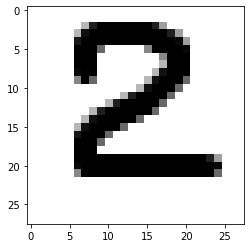

In [7]:
img("two.png")

Распознанная цифра: 5


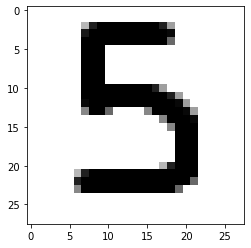

In [8]:
img("five.png")

Распознанная цифра: 4


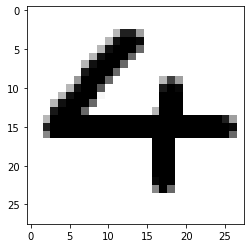

In [10]:
img("1212.png")